In [1]:
import pandas as pd
from siuba import *
from siuba.siu import call
from plotnine import *
import json
import matplotlib.pyplot as pp

In [2]:
# load all the data
commits_raw = pd.read_pickle("../data/graphql/commits_total.pkl")
commits_df = pd.DataFrame()
for repo in commits_raw:
    commits_df = pd.concat([commits_df, pd.DataFrame(repo)])

In [3]:
issues_total = pd.read_pickle("../data/graphql/issues_total.pkl")
issuespr_total = pd.read_pickle("../data/graphql/issuespr_total.pkl")
issues_df = pd.concat((pd.DataFrame(issues_total), pd.DataFrame(issuespr_total)))

In [4]:
with open("../data/repos/topic_combined.json", "r") as read_file:
    raw = json.load(read_file)
repo_df = pd.DataFrame(raw)

In [5]:
star_pickle = pd.read_pickle("../data/graphql/stargazers_total.pkl")
star_df = pd.DataFrame(star_pickle)

Scope: looking at just tools.

How to prove if something is an OSS tool?

- has an [OSI license](https://opensource.org/licenses)
- has at least one open issue (probably not a strong criteria)
- is public

think of removing

- lists such as "awesome mlops" esque - maybe their own cluster, as enablement for the community - split up into two types of analysis
- school projects (will probably be at least partially removed with no license?)

What other tags to collect?

- mlops
- model-management

Other metrics to bring in?

- contributors (strong player), stargazers community, issues/PRs
- thinking of principles/rubric (all in one vs. specific)


## Q1: How much are these projects growing?


In [6]:
growth = (
    commits_df
    >> arrange(_.committer_date)
    >> mutate(
        n_1_commits=1,
        cumsum_commits=_.groupby("repository_id")["n_1_commits"].transform(
            pd.Series.cumsum
        ),
    )
    >> ungroup()
)


In [7]:
# convert this to datetime2013-05-15T08:35:45+02:00
(growth
    >> filter(_.repository_id == _.repository_id.iloc[0])
    >> mutate(
        committer_date_dt = call(pd.to_datetime, _.committer_date)
    )
    # >> _.set_index("committer_date")
    # >> _.resample(rule='M', on='committer_date')['cumsum_commits']
    # >> ggplot()
    # + geom_line(aes('committer_date', 'cumsum_commits'))
)#DateTimeIndex('committer_date_dt')#.resample(rule='M', on='committer_date')

,sha,repository_id,author_email,committer_email,author_name,author_date,committer_name,committer_date,message,n_1_commits,cumsum_commits,committer_date_dt
6095,3fa5994f589a6b73d1b435cada74f84ece7788f0,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,jdowling@kth.se,jdowling@kth.se,Jim Dowling,2013-05-15T08:35:45+02:00,Jim Dowling,2013-05-15T08:35:45+02:00,Imported KTHFS Dashboard,1,1,2013-05-15 08:35:45+02:00
6094,41f8ffb66dc1a3a8eb60e4921dbad8cac55be4d1,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,jdowling@kth.se,jdowling@kth.se,Jim Dowling,2013-05-15T08:42:00+02:00,Jim Dowling,2013-05-15T08:42:00+02:00,Removed script for creating jarmon symlink,1,2,2013-05-15 08:42:00+02:00
6093,51fa793432d0126f7c4d821fc4db685a84bef2bb,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,afzali@kth.se,afzali@kth.se,Hamidreza Afzali,2013-05-21T16:45:21+02:00,Hamidreza Afzali,2013-05-21T16:45:21+02:00,Upgraded to a newer version copied from kthfs ...,1,3,2013-05-21 16:45:21+02:00
6092,9813c228a0aa6f73a50b21c66a03c34664df63fb,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,jdowling@sics.se,jdowling@sics.se,Jim Dowling,2013-05-21T17:04:20+02:00,Jim Dowling,2013-05-21T17:04:20+02:00,Merge branch 'hamid_upgrade' of ghetto.sics.se...,1,4,2013-05-21 17:04:20+02:00
6091,ad3af55e5e33aea81294697273f6571089b6c4d3,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,a.lorenteleal@gmail.com,a.lorenteleal@gmail.com,alorlea,2013-05-21T16:23:04+02:00,alorlea,2013-05-21T17:20:52+02:00,added the async api support,1,5,2013-05-21 17:20:52+02:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,50049920c9a6fa915d997be1aae15f942f89d4cc,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,ormenisan.adrian@gmail.com,noreply@github.com,Alex Ormenisan,2023-01-19T16:05:29+02:00,GitHub,2023-01-19T16:05:29+02:00,[HWORKS-372] explicit provenance missing commu...,1,6092,2023-01-19 16:05:29+02:00
3,801f45bb8b62d954167f760aa00d266b1f1b9101,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,55157590+DhananjayMukhedkar@users.noreply.gith...,noreply@github.com,Dhananjay Mukhedkar,2023-01-19T16:56:27+01:00,GitHub,2023-01-19T16:56:27+01:00,[FSTORE-313] fix null check for feature group...,1,6093,2023-01-19 16:56:27+01:00
2,8f291f3a58e07b60a8991b9ac9d870553f23106b,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,robin.eric.andersson@gmail.com,noreply@github.com,Robin Andersson,2023-01-19T16:57:39+01:00,GitHub,2023-01-19T16:57:39+01:00,[FSTORE-388][APPEND] Move Agent role to correc...,1,6094,2023-01-19 16:57:39+01:00
1,2a55ea7bc77e6cbef538e10e63a3bebdd7c97bd8,MDEwOlJlcG9zaXRvcnkxNDI0MTAzMzE=,antonios@logicalclocks.com,noreply@github.com,Antonis Kouzoupis,2023-01-23T13:08:59+01:00,GitHub,2023-01-23T13:08:59+01:00,[HWORKS-380] Close PEMParser resource (#1288),1,6095,2023-01-23 13:08:59+01:00


sliders for time, select per repo or per cluster (from labels?)

# Q2: how many repos are people starring? what repos?

customer segmentation analysis

what types of users are contributing (other repos theyve starred or contributed to?) profiling mlops folx
other ml frameworks


In [8]:
print("mean: ", repo_df.stargazers_count.mean(), \
    "\nmedian: ", repo_df.stargazers_count.median())


mean:  286.3524904214559 
median:  3.0


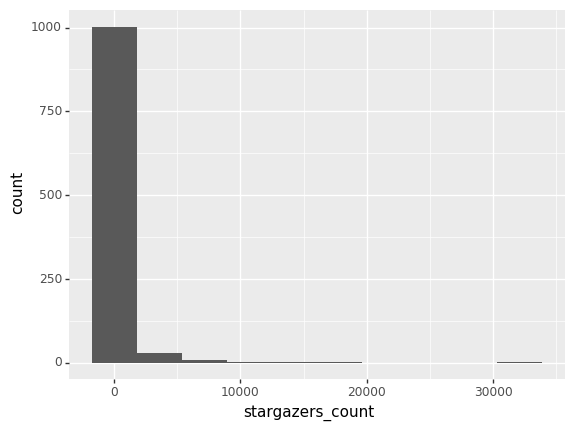

<ggplot: (821612554)>

In [22]:
(
    ggplot(repo_df, aes(x='stargazers_count'))
    + geom_histogram(bins=10)
)

okay, how many >10?

In [23]:
(repo_df
    >> filter(_.stargazers_count < 10)
    >> count()
    >> mutate(
        percent_less_10 = _.n/len(repo_df)
    )
)

,n,percent_less_10
0,666,0.637931


## Stargazers


In [11]:
len(star_df.user_id.unique())

72664

In [19]:
len(star_df.repository_id.unique())

5

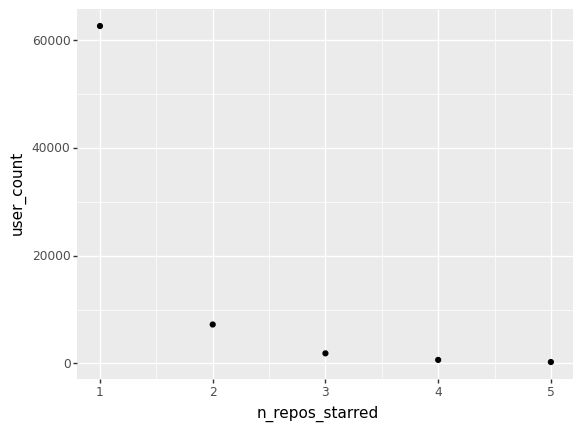

<ggplot: (821561167)>

In [13]:
count_authors = (
    star_df["user_id"]
    .value_counts()
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "n_repos_starred", "user_id": "user_count"})
)

(ggplot(count_authors, aes("n_repos_starred", "user_count")) + geom_point())


people tend to only star one framework
is it all the same framework?


do the people who star more contribute more?

In [14]:
_1 = (
    star_df["user_id"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "user_id", "user_id": "n_repos_starred"})
)

In [15]:
# just use for joins 
_2 = star_df >> full_join(_, _1, on="user_id")
_3 = repo_df[["full_name", "node_id"]].rename(
    columns={"node_id": "repository_id"}
)

In [16]:
## users + how many repos they star + repo name
stars_repo_name = _2 >> left_join(_, _3, on="repository_id")
stars_repo_name


,repository_id,user_id,user_login,starred_at,n_repos_starred,full_name
0,MDEwOlJlcG9zaXRvcnkxNTYxNTcwNTU=,MDQ6VXNlcjE0ODY3ODE5,raghuch,2018-11-21T11:50:55Z,1,GokuMohandas/Made-With-ML
1,MDEwOlJlcG9zaXRvcnkxNTYxNTcwNTU=,MDQ6VXNlcjEzODgxMDA=,vishalbelsare,2018-11-30T14:34:05Z,3,GokuMohandas/Made-With-ML
2,MDEwOlJlcG9zaXRvcnkyNDAzMTUwNDY=,MDQ6VXNlcjEzODgxMDA=,vishalbelsare,2020-06-15T08:32:23Z,3,jina-ai/jina
3,MDEwOlJlcG9zaXRvcnkxMzU2NzM0NTE=,MDQ6VXNlcjEzODgxMDA=,vishalbelsare,2021-07-20T16:35:12Z,3,microsoft/nni
4,MDEwOlJlcG9zaXRvcnkxNTYxNTcwNTU=,MDQ6VXNlcjM1NTM3MDE0,paulananth,2018-12-01T00:48:08Z,1,GokuMohandas/Made-With-ML
...,...,...,...,...,...,...
86581,MDEwOlJlcG9zaXRvcnkxOTI2NDA1Mjk=,MDQ6VXNlcjg3MTE2NTcw,hyunsungK,2023-01-25T11:17:15Z,1,heartexlabs/label-studio
86582,MDEwOlJlcG9zaXRvcnkxOTI2NDA1Mjk=,MDQ6VXNlcjcxNDM1OQ==,ourgit,2023-01-25T14:34:50Z,1,heartexlabs/label-studio
86583,MDEwOlJlcG9zaXRvcnkxOTI2NDA1Mjk=,MDQ6VXNlcjU4MzU5NjI1,alcompa,2023-01-25T16:02:09Z,1,heartexlabs/label-studio
86584,MDEwOlJlcG9zaXRvcnkxOTI2NDA1Mjk=,MDQ6VXNlcjExOTQ4MjUw,jugodu,2023-01-25T19:34:15Z,1,heartexlabs/label-studio


In [17]:
assert len(stars_repo_name.full_name.unique()) == len(star_df.repository_id.unique())

## What are these tools doing?

ie, monitoring, for certain model, etc

from description? README? 
probably not commits


languages from gh
look at .gitattributes 
(in python world, dependency signals?)
^^


## How active are these people?

- watchers
- users
- bug reporters
- PRs
- core maintainers


TODO: 

- [] pull more data for stargazers
- [] answer more questions
- [] start thinking about modeling
- [] wireframe shiny UI (likely shiny for python)


things to include for shiny: